# Population change correlation analysis

This Notebook contains the analysis for correlations with population change from 2010 to 2020 with Accessibility, Marginalization and House density

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## Accessibility

Download accessibility hex_bins

In [3]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
c = 'Guadalajara'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [4]:
print(hex_bins.shape)
hex_bins.head(2)

(2969, 19)


,idx_accessibility,idx_hospitales,idx_supermercado,idx_farmacias,node_count,wAcc,wHsp,wSpm,wFrm,idx_accessibility_wavg,idx_hospitales_wavg,idx_supermercado_wavg,idx_farmacias_wavg,geometry,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados
0,0.000157,0.000473,5.887650e-24,2.189688e-23,5,0.000787,0.002364,2.943825e-23,1.094844e-22,4.657651e-09,1.398694e-08,1.742094e-28,6.479058e-28,"POLYGON ((-103.54324 20.40862, -103.54269 20.4...",8849aa2611fffff,14002,9041.266800,9983.789800,9250.494800
1,0.000343,0.001031,1.124020e-21,4.180368e-21,12,0.004118,0.012368,1.348825e-20,5.016442e-20,2.437182e-08,7.318864e-08,7.982061e-26,2.968625e-25,"POLYGON ((-103.54722 20.40036, -103.54269 20.4...",8849aa261bfffff,14002,8371.216417,9313.739417,8580.444417


<AxesSubplot:>

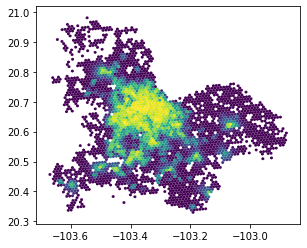

In [6]:
hex_bins.loc[hex_bins.idx_accessibility>0].plot('idx_accessibility')

## Marginalization

Download marginalization hex_bins

In [11]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
c = 'Guadalajara'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [12]:
print(hex_marg.shape)
hex_marg.head(2)

(1163, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,0.029676,0.697379,4.282201,0.593514,2.756871,120.556725,0.941744
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,0.000000,1.492537,15.049751,0.373134,8.333333,122.339516,0.955670


<AxesSubplot:>

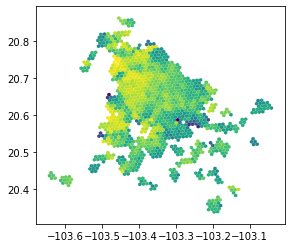

In [13]:
hex_marg.plot('imn_2020')

## Population change

In [15]:
hex_pop = gpd.read_file('../data/processed/Hexbins_Guadalajara_AnalisisVivienda_OC22_UTM_v1.geojson')
print(hex_pop.shape)
hex_pop.head(2)

(1187, 249)


,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,...,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,LISA_CL_PobDif,CATEGORIES,CATEGORIES_BoxVivDes,LISA_CL_DensPob,geometry
0,8849abc9ebfffff,14002,273.168550,135.64044,137.528090,13.123595,6.831461,6.292135,260.044950,128.808990,...,0.104639,0.525947,0.848408,0.497838,0.017827,0,3,3,0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4..."
1,8849abc9e3fffff,14002,98.333336,46.00000,43.333332,4.666666,2.333333,2.333333,84.666664,43.666668,...,0.134831,-0.236865,0.698630,-0.506738,0.065415,0,4,4,0,"POLYGON ((-103.61374 20.43321, -103.61319 20.4..."


<AxesSubplot:>

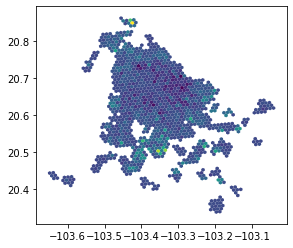

In [16]:
hex_pop.plot('T_Pob_10_20')

## Correlation analysis

In [48]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_TVivDes_10_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(1156, 6)


,hex_id_8,T_Pob_10_20,R_TVivDes_10_20,geometry,idx_accessibility,imn_2020
0,8849abc9ebfffff,-132.856780,-0.369222,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",0.205928,0.941744
1,8849abc9e3fffff,-6.166664,-0.636364,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",0.112753,0.955670


### Accessibility vs Population change

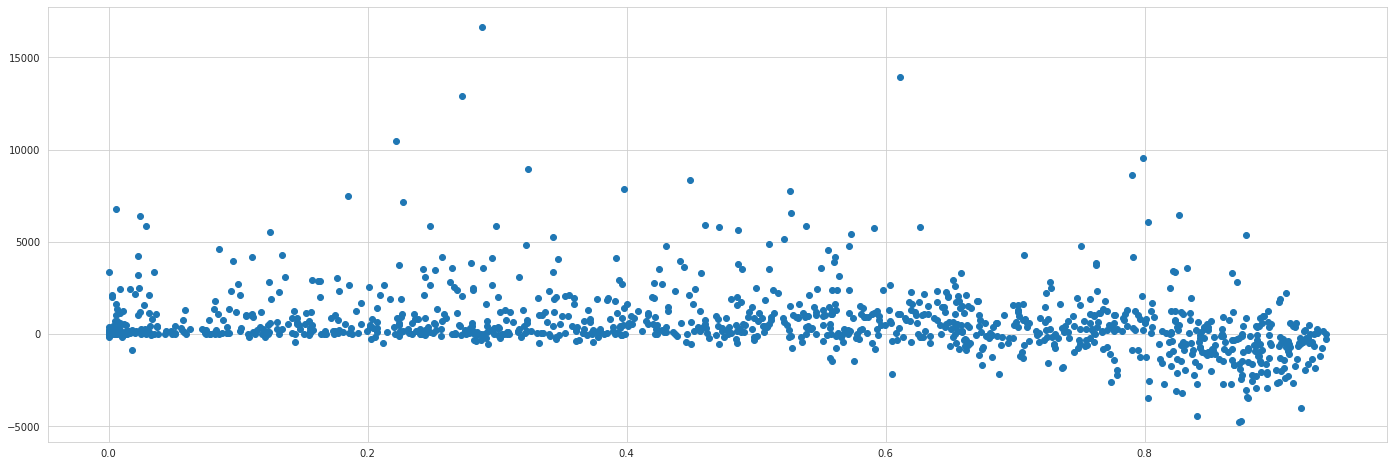

In [35]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

In [36]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.22960502],
       [-0.22960502,  1.        ]])

### Marginalization vs Population change

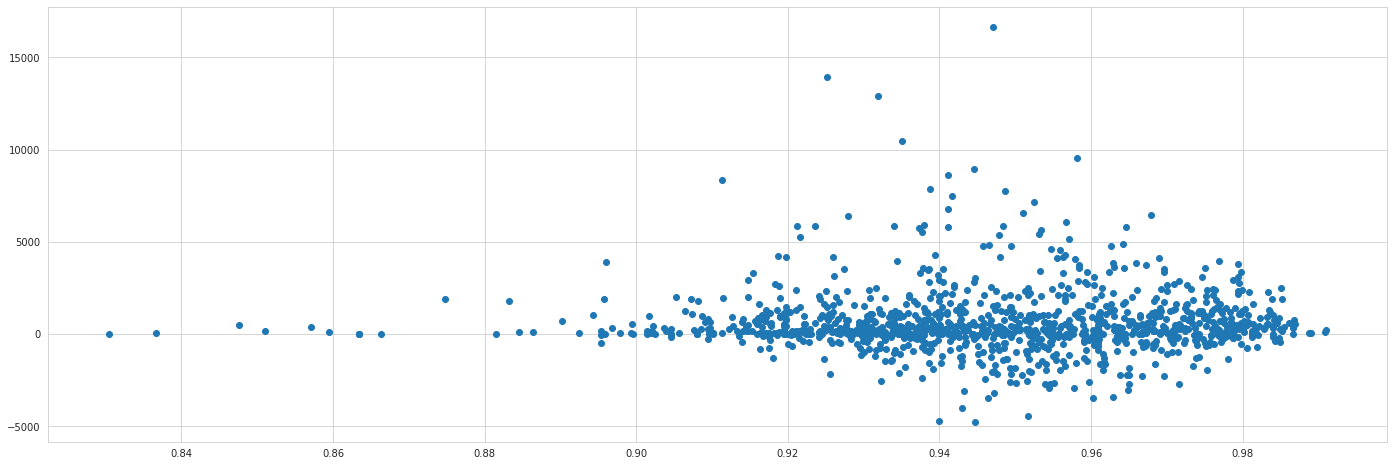

In [37]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

In [38]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.00000000e+00, -8.43519656e-04],
       [-8.43519656e-04,  1.00000000e+00]])

### House change vs Population change

(0.0, 1.0)

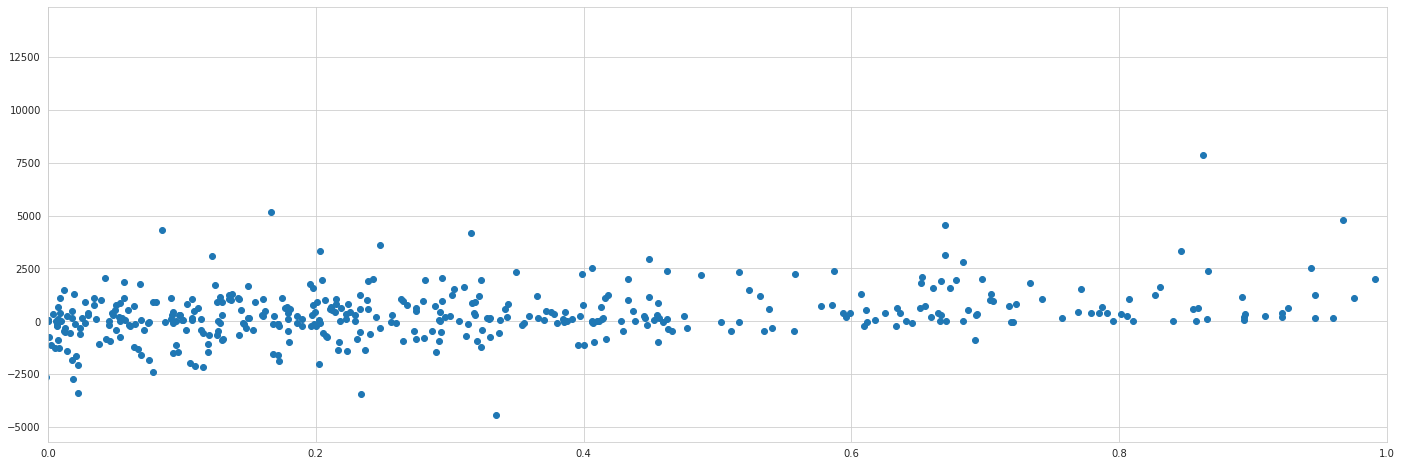

In [39]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.R_TVivDes_10_20, hex_corr.T_Pob_10_20)

ax.set_xlim([0, 1])

In [40]:
x = np.array(hex_corr.R_TVivDes_10_20)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[nan, nan],
       [nan,  1.]])

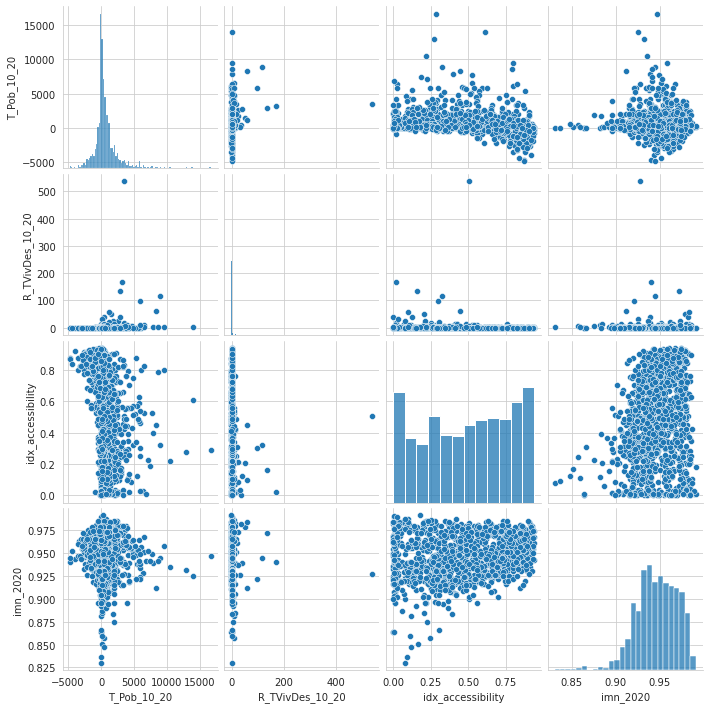

In [41]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

## Boxplots

### Group data marginalization

In [49]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

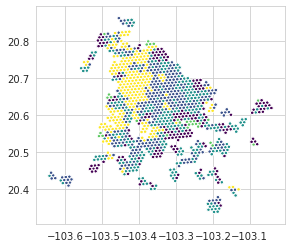

In [51]:
hex_corr.plot('Grado_Marg', 'viridis')

<AxesSubplot:>

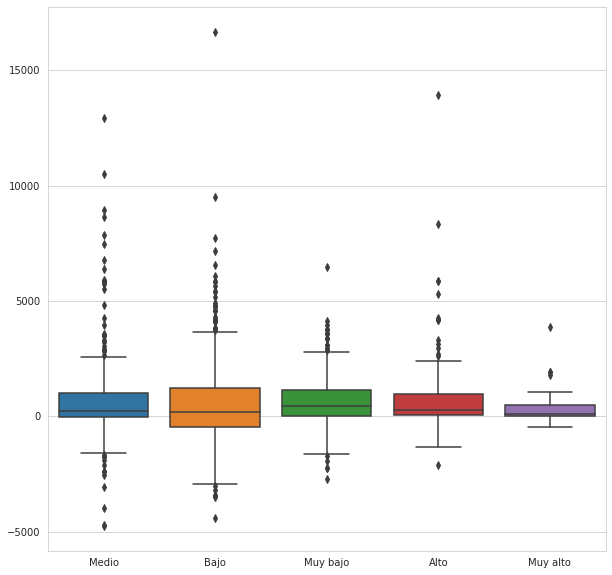

In [53]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

In [73]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

T_Pob_10_20                          R_TVivDes_10_20            \
                median        mean          std          median      mean   
Grado_Marg                                                                  
Alto         282.61800  756.260909  1570.494817        0.210675  1.982204   
Bajo         202.47940  550.713558  2148.521747        0.017819  0.591741   
Medio        229.06535  624.286188  1862.700067        0.107561  3.377543   
Muy alto      91.27234  466.678382   886.147088        1.714934  3.397921   
Muy bajo     442.49200  649.046705  1148.699279       -0.000713  1.840683   

                      idx_accessibility                      imn_2020  \
                  std            median      mean       std    median   
Grado_Marg                                                              
Alto         9.387224          0.343793  0.359399  0.233163  0.918821   
Bajo         2.340581          0.698249  0.605493  0.280231  0.955668   
Medio       33.366763          0.500001  0.478804  0.270857  0.937275   
Muy alto     3.831703          0.167348  0.190926  0.155124  0.886337   
Muy bajo    10.707648          0.521854  0.493317  0.305469  0.975199   

                                
                mean       std  
Grado_Marg                      
Alto        0.917424  0.006500  
Bajo        0.955853  0.005600  
Medio       0.936889  0.005299  
Muy alto    0.879075  0.020634  
Muy bajo    0.975427  0.005681

### Group by accessibility

In [64]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

<AxesSubplot:>

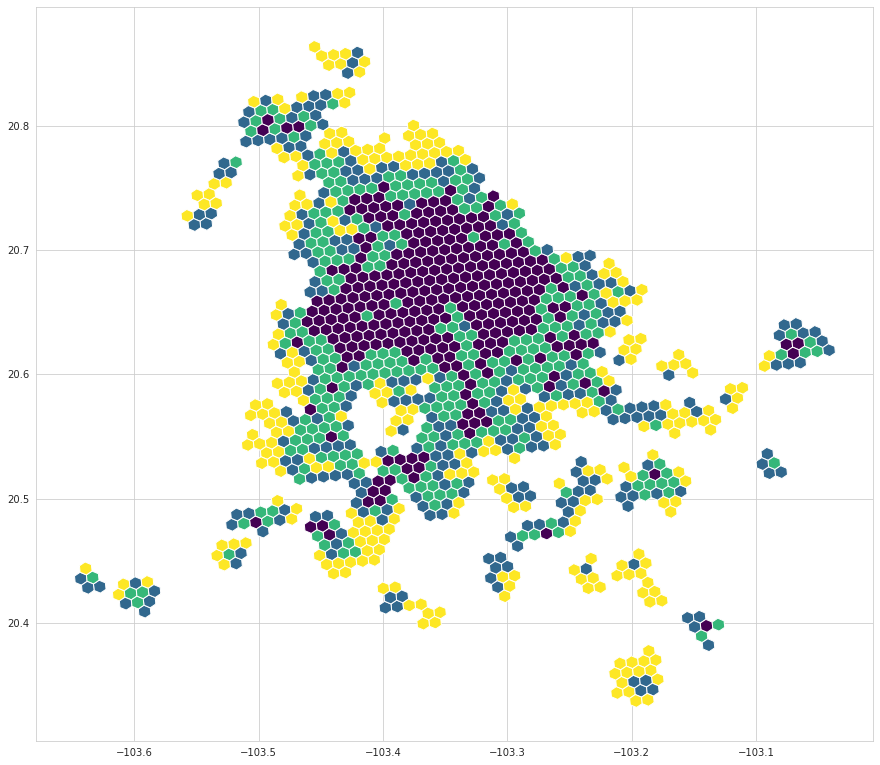

In [96]:
fig, ax = plt.subplots(figsize=(15,15))

hex_corr.plot('Nivel_Acc', 'viridis', ax=ax)

<AxesSubplot:>

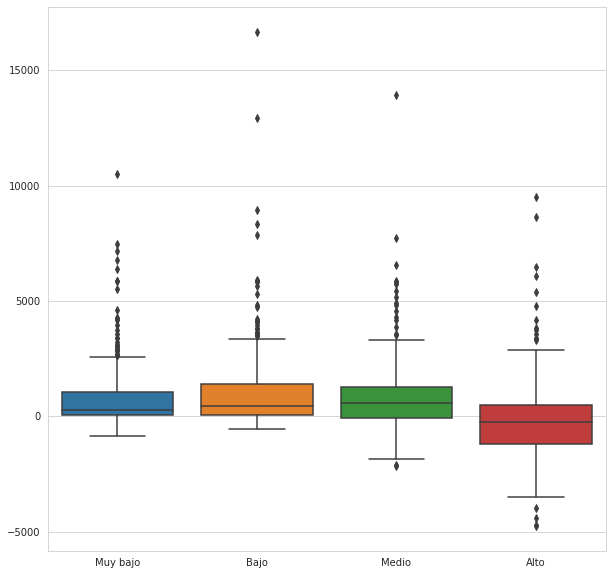

In [67]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

In [71]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

T_Pob_10_20                           R_TVivDes_10_20            \
               median         mean          std          median      mean   
Nivel_Acc                                                                   
Alto       -268.32025  -218.672946  1749.909394        0.046644  0.162383   
Bajo        431.85675  1098.784012  1914.507258        0.219116  2.234936   
Medio       559.46660   819.344970  1589.351223        0.004070  2.082496   
Muy bajo    256.37612   847.816527  1433.971819        0.450904  4.728699   

                     idx_accessibility                      imn_2020  \
                 std            median      mean       std    median   
Nivel_Acc                                                              
Alto        0.889086          0.851810  0.849433  0.052948  0.955330   
Bajo       10.730994          0.369972  0.371553  0.074230  0.940598   
Medio      31.330844          0.627565  0.624577  0.070630  0.945796   
Muy bajo   18.169953          0.094972  0.102662  0.082778  0.939129   

                               
               mean       std  
Nivel_Acc                      
Alto       0.955024  0.014661  
Bajo       0.942222  0.023239  
Medio      0.947158  0.019866  
Muy bajo   0.941371  0.030128

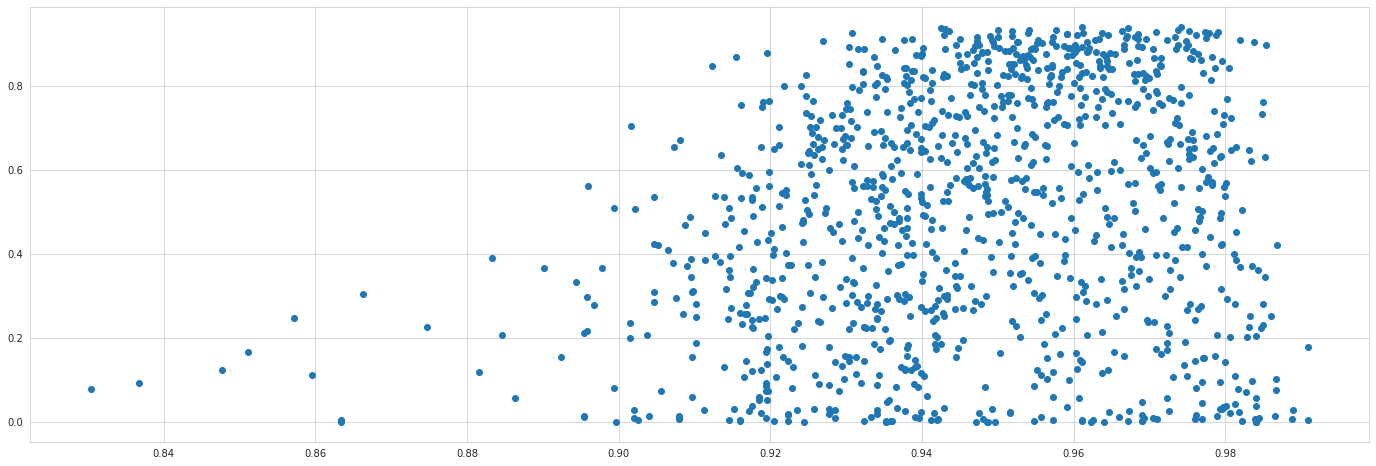

In [69]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.idx_accessibility)

In [82]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.22157817],
       [0.22157817, 1.        ]])

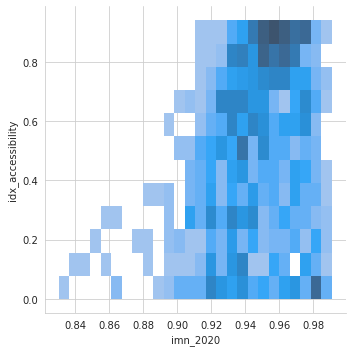

In [93]:
sns.displot(hex_corr, x='imn_2020',y='idx_accessibility')

## Monterrey

In [3]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))
    
print(hex_bins.shape)

(3809, 19)


In [4]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))
print(hex_marg.shape)

(1463, 17)


In [5]:
hex_pop = gpd.read_file('../data/processed/Hexbins_Monterrey_AnalisisVivienda_OC22_UTM_v1.geojson')
print(hex_pop.shape)

(1545, 248)


In [6]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_TVivDes_10_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(1462, 6)


,hex_id_8,T_Pob_10_20,R_TVivDes_10_20,geometry,idx_accessibility,imn_2020
0,8848a23881fffff,-75.46022,0.356221,"POLYGON ((-100.38026 25.93877, -100.38069 25.9...",0.025897,0.964433
1,8848a23883fffff,64.39648,0.822824,"POLYGON ((-100.38588 25.94625, -100.38631 25.9...",0.212062,0.961350


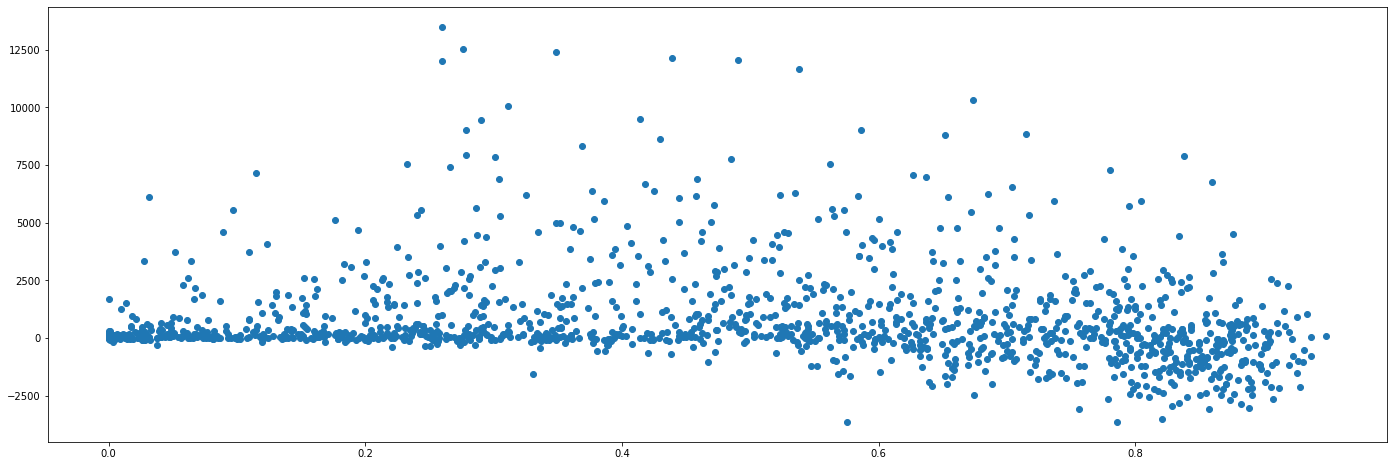

In [7]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

In [8]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.11810147],
       [-0.11810147,  1.        ]])

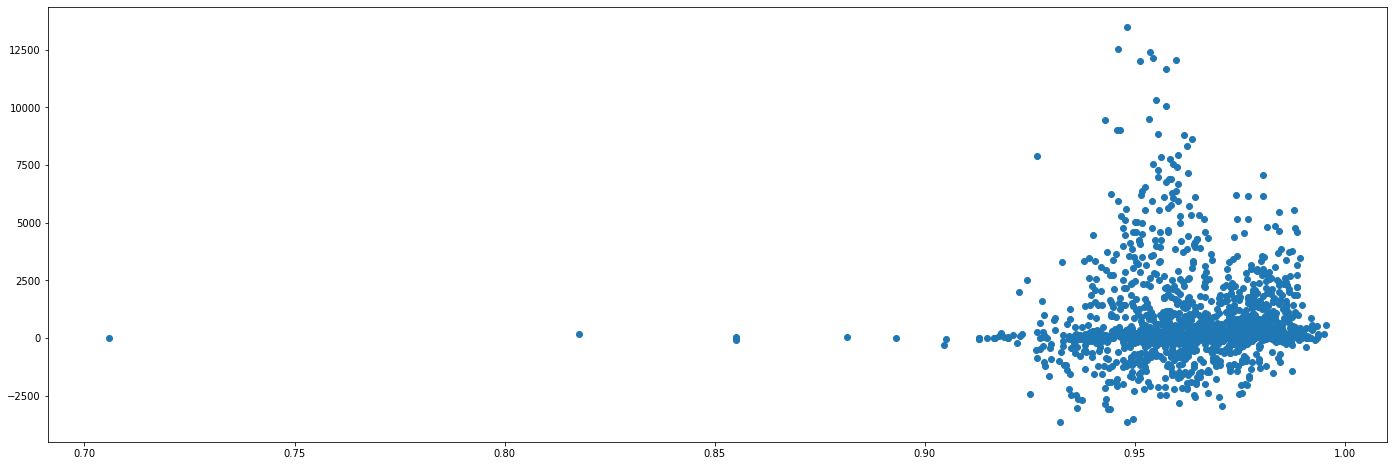

In [9]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

In [10]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[1.        , 0.04635419],
       [0.04635419, 1.        ]])

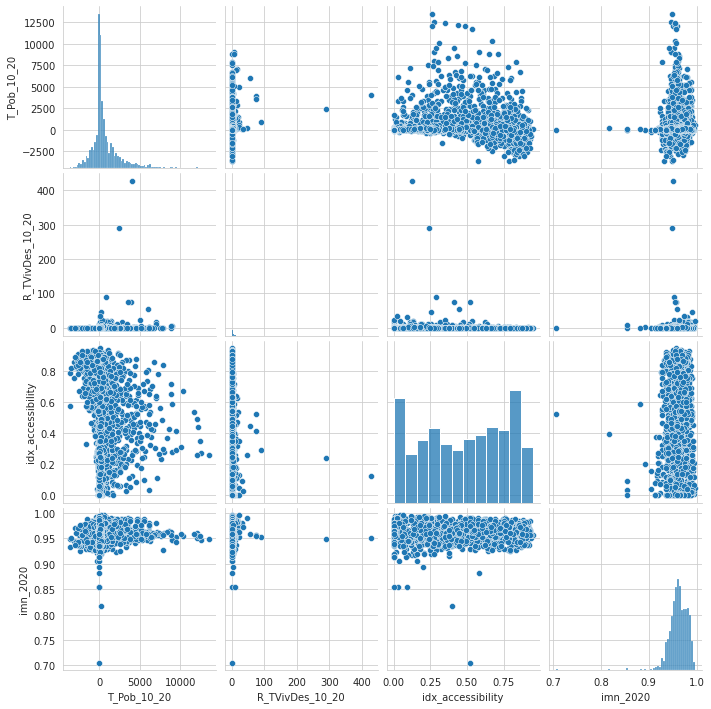

In [11]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

In [12]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

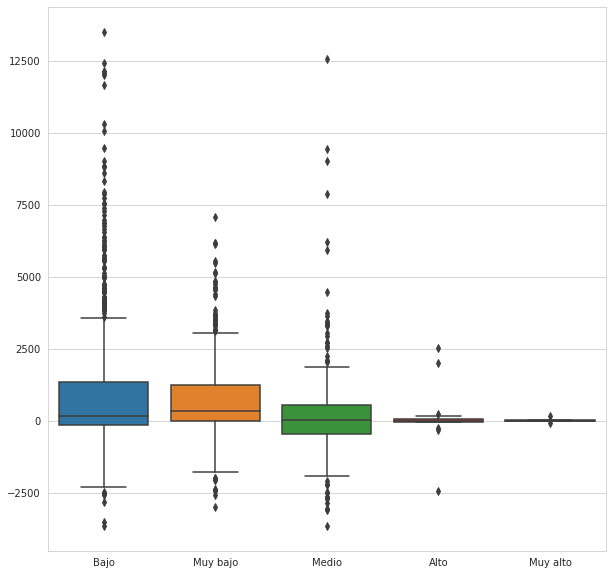

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

In [14]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

T_Pob_10_20                          R_TVivDes_10_20            \
                median        mean          std          median      mean   
Grado_Marg                                                                  
Alto          7.957236   99.724658   862.666966       -0.081767  0.595813   
Bajo        170.624350  987.699618  2450.062480        0.032093  2.646678   
Medio        26.383720  329.781215  1998.469538        0.169180  0.477609   
Muy alto     18.122450   28.421999    74.626242        0.616327  2.262057   
Muy bajo    358.887600  704.967068  1350.547529       -0.063430  0.752987   

                      idx_accessibility                      imn_2020  \
                  std            median      mean       std    median   
Grado_Marg                                                              
Alto         1.524285          0.130073  0.180846  0.206291  0.918230   
Bajo        24.235272          0.502676  0.477568  0.293464  0.957801   
Medio        1.346160          0.438089  0.457078  0.275463  0.939553   
Muy alto     3.604094          0.201660  0.262543  0.239036  0.854966   
Muy bajo     3.832823          0.544924  0.504023  0.279116  0.978066   

                                
                mean       std  
Grado_Marg                      
Alto        0.917398  0.005457  
Bajo        0.957320  0.005482  
Medio       0.938874  0.005239  
Muy alto    0.837552  0.062833  
Muy bajo    0.977950  0.007094

In [15]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

<AxesSubplot:>

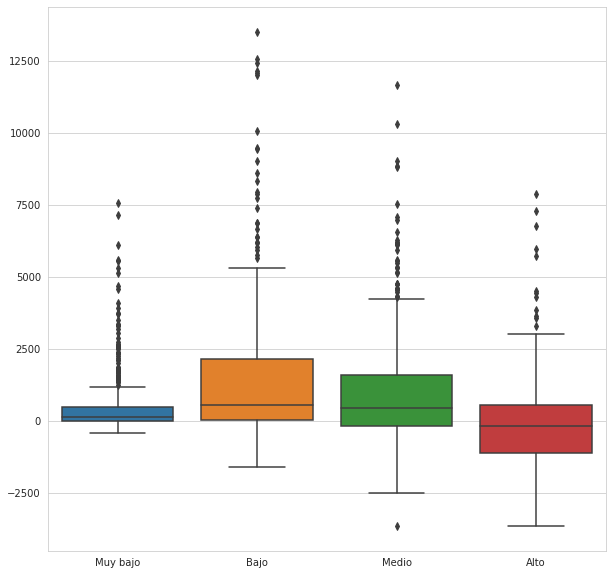

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

In [17]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

T_Pob_10_20                           R_TVivDes_10_20            \
               median         mean          std          median      mean   
Nivel_Acc                                                                   
Alto      -170.040000   -67.157019  1641.929668       -0.038871  0.001764   
Bajo       547.724025  1614.551236  2541.021753        0.101162  1.918175   
Medio      443.379730   993.994185  2084.038442       -0.062101  0.473269   
Muy bajo   129.570200   574.680296  1135.015391        0.431403  4.947667   

                     idx_accessibility                      imn_2020  \
                 std            median      mean       std    median   
Nivel_Acc                                                              
Alto        0.384617          0.836317  0.836630  0.046365  0.963979   
Bajo        8.966476          0.358727  0.367516  0.076319  0.960164   
Medio       4.228651          0.628380  0.626569  0.070022  0.965217   
Muy bajo   34.012483          0.095490  0.105235  0.083474  0.961431   

                               
               mean       std  
Nivel_Acc                      
Alto       0.963181  0.013511  
Bajo       0.961022  0.018626  
Medio      0.963134  0.020287  
Muy bajo   0.960780  0.020847

In [19]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.06635359],
       [0.06635359, 1.        ]])

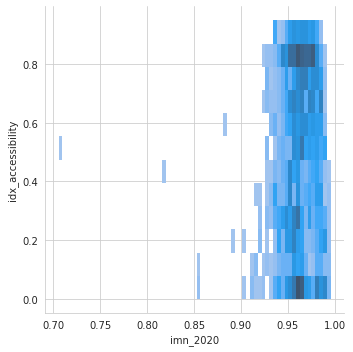

In [18]:
sns.displot(hex_corr, x='imn_2020',y='idx_accessibility')

## ZMVM

In [20]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
c = 'ZMVM'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))
    
print(hex_bins.shape)

(6441, 19)


In [21]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
c = 'ZMVM'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))
print(hex_marg.shape)

(3777, 17)


In [22]:
hex_pop = gpd.read_file('../data/processed/Hexbins_ZMVM_AnalisisVivienda_OC22_UTM_v1.geojson')
print(hex_pop.shape)

(3767, 248)


In [23]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_TVivDes_10_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(3741, 6)


,hex_id_8,T_Pob_10_20,R_TVivDes_10_20,geometry,idx_accessibility,imn_2020
0,884995b8c1fffff,-146.016,-0.113810,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",0.921196,0.965088
1,884995b817fffff,-2012.566,-0.068868,"POLYGON ((-99.15333 19.47646, -99.15369 19.481...",0.841520,0.958849


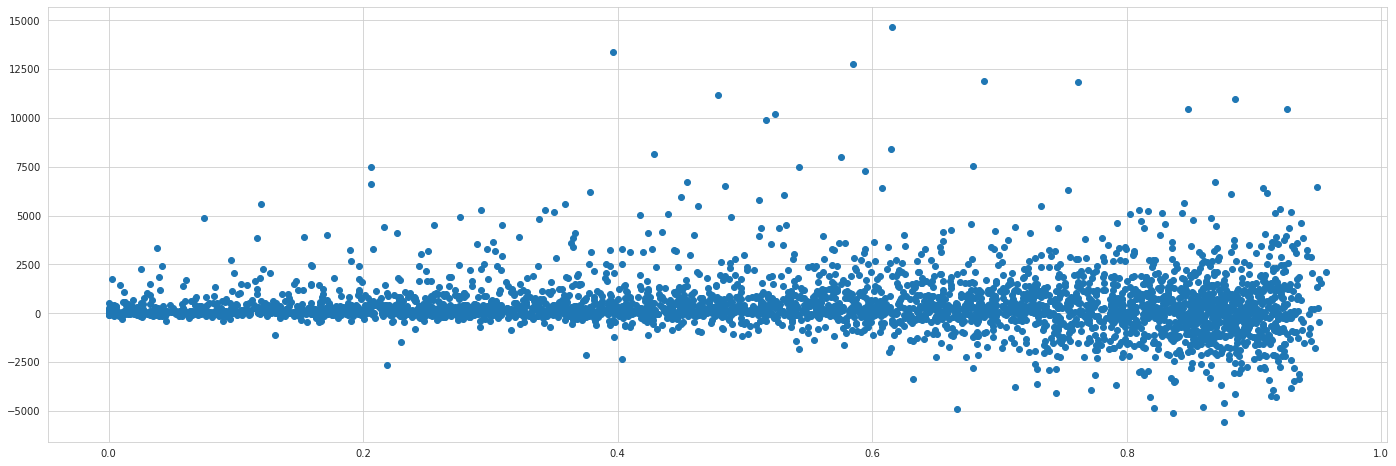

In [24]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

In [25]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.01330344],
       [-0.01330344,  1.        ]])

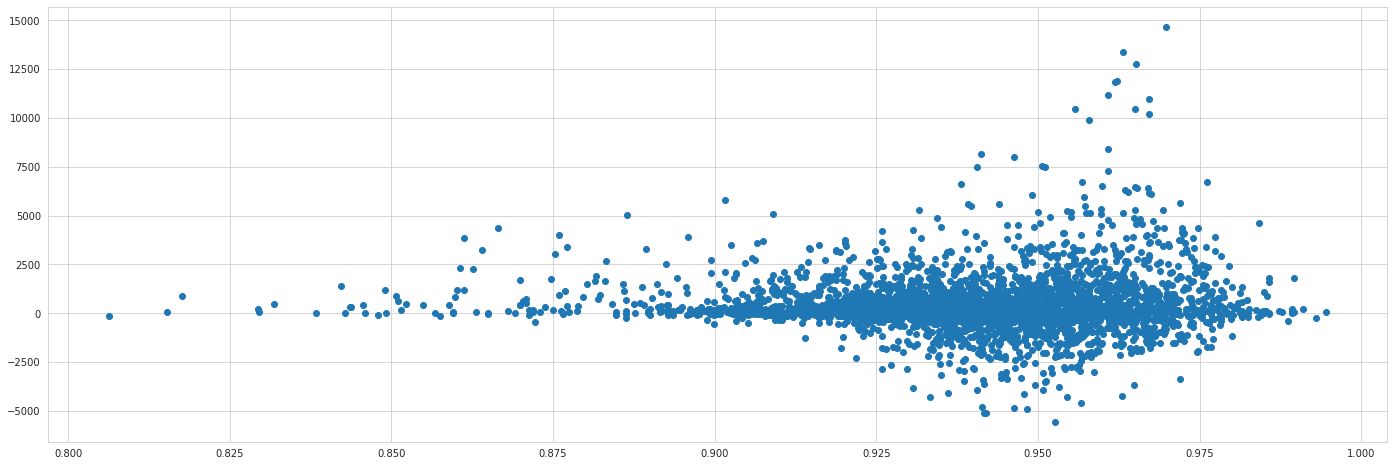

In [26]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

In [27]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[1.       , 0.0428838],
       [0.0428838, 1.       ]])

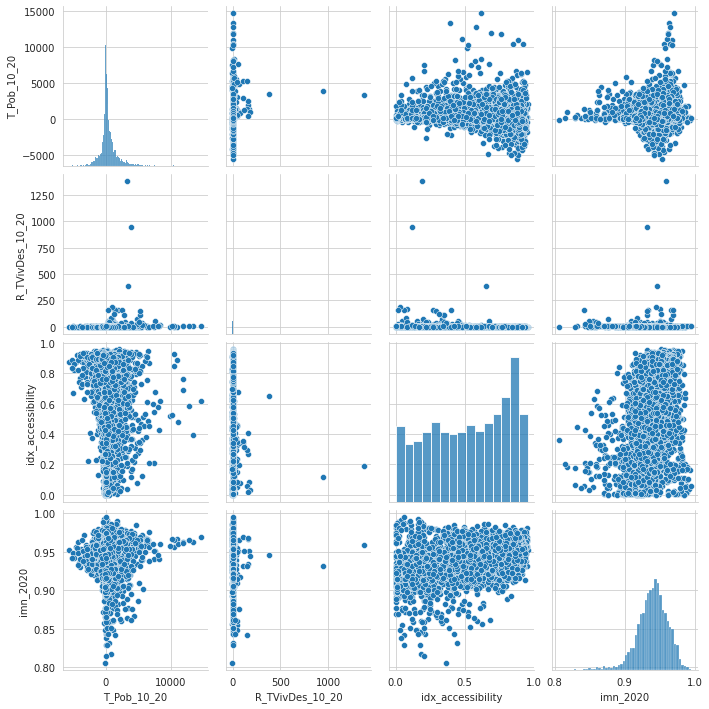

In [28]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

In [29]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

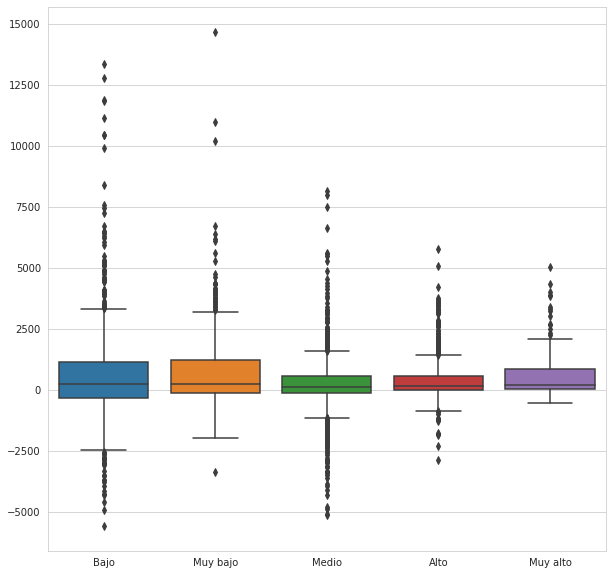

In [30]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

In [31]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

T_Pob_10_20                          R_TVivDes_10_20            \
                median        mean          std          median      mean   
Grado_Marg                                                                  
Alto        162.950670  424.835892   837.852753        0.528228  1.271897   
Bajo        234.458600  528.790095  1870.105975       -0.046177  2.175679   
Medio       123.324150  220.926804  1140.473943        0.233818  2.201704   
Muy alto    213.585175  654.446968  1023.441076        0.831638  4.505040   
Muy bajo    241.197710  770.294212  1815.875721       -0.042072  1.354277   

                      idx_accessibility                      imn_2020  \
                  std            median      mean       std    median   
Grado_Marg                                                              
Alto         4.759261          0.304807  0.358908  0.261658  0.918958   
Bajo        43.258649          0.739682  0.666409  0.232598  0.954513   
Medio       29.533860          0.530166  0.510540  0.260684  0.937261   
Muy alto    16.554404          0.223569  0.253975  0.197562  0.884725   
Muy bajo    13.147388          0.735679  0.629972  0.285365  0.971674   

                                
                mean       std  
Grado_Marg                      
Alto        0.917067  0.007122  
Bajo        0.954986  0.005653  
Medio       0.937204  0.005535  
Muy alto    0.878422  0.019995  
Muy bajo    0.973062  0.005655

In [32]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

<AxesSubplot:>

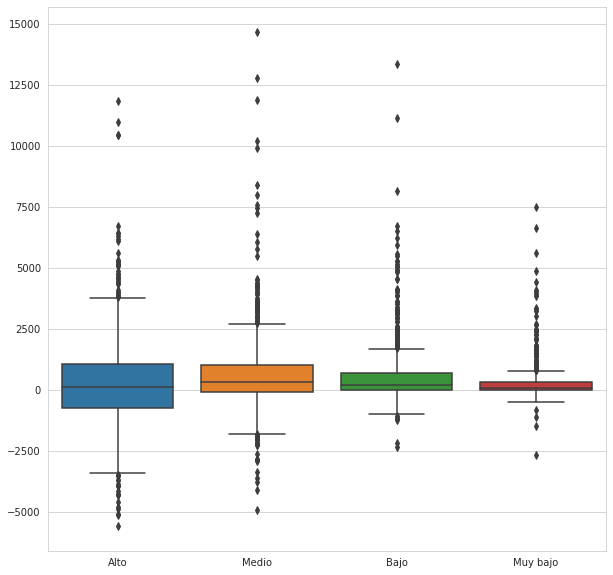

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

In [34]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

T_Pob_10_20                          R_TVivDes_10_20            \
               median        mean          std          median      mean   
Nivel_Acc                                                                  
Alto       124.882000  265.082717  1765.976636       -0.032812  0.038505   
Bajo       216.717390  556.838840  1202.589344        0.451422  2.403802   
Medio      324.383700  595.243250  1579.981670        0.105730  0.829141   
Muy bajo    81.062817  297.400587   729.995421        0.634210  6.464468   

                     idx_accessibility                      imn_2020  \
                 std            median      mean       std    median   
Nivel_Acc                                                              
Alto        0.449455          0.854928  0.851438  0.050853  0.952032   
Bajo       12.478023          0.371480  0.373471  0.073139  0.936269   
Medio      12.681959          0.635098  0.632131  0.072313  0.942736   
Muy bajo   66.432263          0.124023  0.121254  0.079051  0.926739   

                               
               mean       std  
Nivel_Acc                      
Alto       0.950366  0.015319  
Bajo       0.934698  0.021403  
Medio      0.941979  0.018389  
Muy bajo   0.926489  0.026189

In [35]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.41158012],
       [0.41158012, 1.        ]])

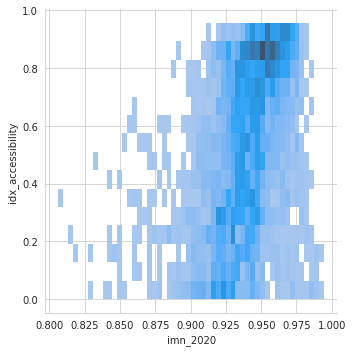

In [36]:
sns.displot(hex_corr, x='imn_2020',y='idx_accessibility')